In [0]:
import statistics
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn import preprocessing
style.use('ggplot')
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
'''
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination
'''

'\nPclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)\nsurvival Survival (0 = No; 1 = Yes)\nname Name\nsex Sex\nage Age\nsibsp Number of Siblings/Spouses Aboard\nparch Number of Parents/Children Aboard\nticket Ticket Number\nfare Passenger Fare (British pound)\ncabin Cabin\nembarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)\nboat Lifeboat\nbody Body Identification Number\nhome.dest Home/Destination\n'

In [0]:
def handle_non_numerical_data(data):
    columns = data.columns.values

    for column in columns:
        text_digit_val = {}

        def convert_to_int(val):
            return text_digit_val[val]

        if data[column].dtype != np.int64 and data[column].dtype != np.float64:
            column_contents = data[column].values.tolist()
            # Finding just the uniques.
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_val:
                    # Creating dict that contains new id per unique string.
                    text_digit_val[unique] = x
                    x += 1
            # Now we map the new "id" value to replace the string.
            data[column] = list(map(convert_to_int, data[column]))
    return data

In [0]:
df = pd.read_excel('titanic.xls')
original_df = pd.DataFrame.copy(df)
df.drop(['body', 'name', 'boat'], 1, inplace=True)
df.fillna(0, inplace=True)

In [5]:
df = handle_non_numerical_data(df)
X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])
clf = MeanShift()
clf.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [0]:
labels = clf.labels_
cluster_centers = clf.cluster_centers_
original_df['cluster_group']=np.nan

In [7]:
for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]

n_clusters_ = len(np.unique(labels))
survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    # print(temp_df.head())

    survival_cluster = temp_df[  (temp_df['survived'] == 1) ]

    survival_rate = len(survival_cluster) / len(temp_df)
    # print(i,survival_rate)
    survival_rates[i] = survival_rate

print(survival_rates)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


{0: 0.37850467289719625, 1: 0.8666666666666667, 2: 0.1}


In [8]:
print(original_df[ (original_df['cluster_group']==0) ].describe())

            pclass     survived          age        sibsp        parch         fare        body  cluster_group
count  1284.000000  1284.000000  1023.000000  1284.000000  1284.000000  1283.000000  119.000000         1284.0
mean      2.304517     0.378505    29.646791     0.492212     0.326324    29.774736  159.571429            0.0
std       0.831911     0.485203    14.361759     1.044946     0.674829    39.428483   97.302914            0.0
min       1.000000     0.000000     0.166700     0.000000     0.000000     0.000000    1.000000            0.0
25%       2.000000     0.000000    21.000000     0.000000     0.000000     7.895800   71.000000            0.0
50%       3.000000     0.000000    28.000000     0.000000     0.000000    14.000000  155.000000            0.0
75%       3.000000     1.000000    38.000000     1.000000     0.000000    30.000000  255.500000            0.0
max       3.000000     1.000000    80.000000     8.000000     4.000000   263.000000  328.000000            0.0


In [9]:
print(original_df[ (original_df['cluster_group']==0) ].describe())

            pclass     survived          age        sibsp        parch         fare        body  cluster_group
count  1284.000000  1284.000000  1023.000000  1284.000000  1284.000000  1283.000000  119.000000         1284.0
mean      2.304517     0.378505    29.646791     0.492212     0.326324    29.774736  159.571429            0.0
std       0.831911     0.485203    14.361759     1.044946     0.674829    39.428483   97.302914            0.0
min       1.000000     0.000000     0.166700     0.000000     0.000000     0.000000    1.000000            0.0
25%       2.000000     0.000000    21.000000     0.000000     0.000000     7.895800   71.000000            0.0
50%       3.000000     0.000000    28.000000     0.000000     0.000000    14.000000  155.000000            0.0
75%       3.000000     1.000000    38.000000     1.000000     0.000000    30.000000  255.500000            0.0
max       3.000000     1.000000    80.000000     8.000000     4.000000   263.000000  328.000000            0.0


In [10]:
cluster_0 = (original_df[ (original_df['cluster_group']==0) ])
cluster_0_fc = (cluster_0[ (cluster_0['pclass']==1) ])
print(cluster_0_fc.describe())

       pclass    survived         age       sibsp       parch        fare        body  cluster_group
count   308.0  308.000000  269.000000  308.000000  308.000000  308.000000   35.000000          308.0
mean      1.0    0.607143   39.083333    0.415584    0.301948   75.788772  162.828571            0.0
std       0.0    0.489180   14.473370    0.578680    0.601082   56.719904   82.652172            0.0
min       1.0    0.000000    0.916700    0.000000    0.000000    0.000000   16.000000            0.0
25%       1.0    0.000000   28.000000    0.000000    0.000000   30.500000  109.500000            0.0
50%       1.0    1.000000   39.000000    0.000000    0.000000   57.864600  166.000000            0.0
75%       1.0    1.000000   49.000000    1.000000    0.000000   90.000000  233.000000            0.0
max       1.0    1.000000   80.000000    3.000000    2.000000  263.000000  307.000000            0.0


In [11]:
cluster_0_sc = (cluster_0[ (cluster_0['pclass']==2) ])
print(cluster_0_sc.describe())

       pclass    survived         age       sibsp       parch        fare        body  cluster_group
count   277.0  277.000000  261.000000  277.000000  277.000000  277.000000   31.000000          277.0
mean      2.0    0.429603   29.506705    0.393502    0.368231   21.179196  167.387097            0.0
std       0.0    0.495915   13.638628    0.590100    0.692717   13.607122  107.077753            0.0
min       2.0    0.000000    0.666700    0.000000    0.000000    0.000000   15.000000            0.0
25%       2.0    0.000000   22.000000    0.000000    0.000000   13.000000   78.000000            0.0
50%       2.0    0.000000   29.000000    0.000000    0.000000   15.045800  155.000000            0.0
75%       2.0    1.000000   36.000000    1.000000    1.000000   26.000000  284.500000            0.0
max       2.0    1.000000   70.000000    3.000000    3.000000   73.500000  322.000000            0.0


In [12]:
cluster_0_tc = (cluster_0[ (cluster_0['pclass']==3) ])
print(cluster_0_tc.describe())

       pclass    survived         age       sibsp       parch        fare        body  cluster_group
count   699.0  699.000000  493.000000  699.000000  699.000000  698.000000   53.000000          699.0
mean      3.0    0.257511   24.572008    0.565093    0.320458   12.881673  152.849057            0.0
std       0.0    0.437576   11.897162    1.307784    0.698153   10.876481  101.556236            0.0
min       3.0    0.000000    0.166700    0.000000    0.000000    0.000000    1.000000            0.0
25%       3.0    0.000000   18.000000    0.000000    0.000000    7.750000   67.000000            0.0
50%       3.0    0.000000   24.000000    0.000000    0.000000    8.050000  153.000000            0.0
75%       3.0    1.000000   31.000000    1.000000    0.000000   14.500000  255.000000            0.0
max       3.0    1.000000   74.000000    8.000000    4.000000   69.550000  328.000000            0.0


In [0]:
plot = {'fclass':statistics.mean(cluster_0_fc['survived']), 'sclass':statistics.mean(cluster_0_sc['survived']), 'tclass':statistics.mean(cluster_0_tc['survived'])}
names = list(plot.keys())
values = list(plot.values())

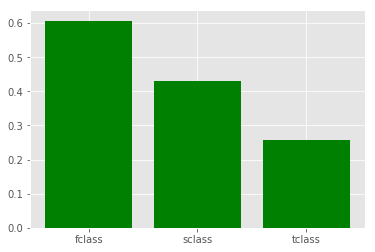

In [14]:
plt.bar(range(len(plot)),values,tick_label=names, color='g')
plt.show()